In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import floor

drop_attribs = [
    "Player Name",             
    "injury_status",           
    "team",                    
    "opp",                     
    "spread",                
    "over_under",              
    "implied_team_score",      
    "L5_dvp_rank",             
    "L5_ppg_floor",            
    "L5_ppg_avg",              
    "L5_ppg_max",              
    "Pos",                    
    "Salary",                  
    "Rest",                    
    "Opp Pace",                
    "Opp DEff",               
    "Opp DvP",                 
    "L2 FGA",                  
    "L5 FGA",               
    "S FGA", 
    "L2 Min",                 
    "L5 Min",                  
    "S Min",                   
    "L5 FP",                   
    "S FP",                    
    "Floor FP",                
    "Ceil FP",                 
    "Actual Min",             
    "Actual FP",               
    "Actual Val",            
    "FantasyFuelPPGProj",      
    "FantasyFuelValueProj", 
    "DFN_PPGProj",      
    "DFN_MinProj",          
    "DFN_ValueProj",          
]

In [498]:
def openBestLineupsForDate():
    file_name = 'BestLineups/2020-01-26'
    file = pd.read_csv(file_name,index_col=[0,1], skipinitialspace=True)
    return file
def openCreatedLineupsForDate():
    file_name = 'BestCreatedLineups/2020-01-26'
    file = pd.read_csv(file_name,index_col=[0,1], skipinitialspace=True)
    return file

x = pd.read_csv('HistoricalData_Merged/2020-01-26')
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 38 columns):
Player Name           151 non-null object
position              151 non-null object
injury_status         36 non-null object
game_date             151 non-null object
team                  151 non-null object
opp                   151 non-null object
spread                151 non-null float64
over_under            151 non-null float64
implied_team_score    151 non-null float64
salary                151 non-null int64
L5_dvp_rank           151 non-null int64
L5_ppg_floor          150 non-null float64
L5_ppg_avg            150 non-null float64
L5_ppg_max            150 non-null float64
ppg_projection        151 non-null float64
value_projection      151 non-null float64
Pos                   151 non-null object
Salary                151 non-null int64
Rest                  151 non-null int64
Opp Pace              151 non-null int64
Opp DEff              151 non-null int64
Opp DvP     

In [499]:
def dropLowScoringLineups(file):
    drop_level = file.groupby(['Lineup Num'])['Actual FP'].sum().mean() - file.groupby(['Lineup Num'])['Actual FP'].sum().std()
    group = file.groupby(['Lineup Num'])
    return group.filter(lambda x: x['Actual FP'].sum() > drop_level)

def plotLineupActualFP(file):
    file.groupby(['Lineup Num'])['Actual FP'].sum().plot(style='.')
    print(file.groupby(['Lineup Num'])['Actual FP'].sum().mean())
    print(file.groupby(['Lineup Num'])['Actual FP'].sum().max())
    
def plotLineupProjectedFP(file, projectionType):
    file.groupby(['Lineup Num'])[projectionType].sum().plot(style='.')

In [500]:
actual = openBestLineupsForDate()
created = openCreatedLineupsForDate()

368.1393939393939
391.90000000000003


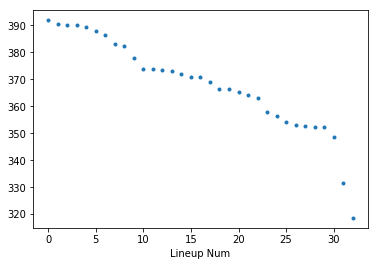

In [501]:
actual = dropLowScoringLineups(actual)
plotLineupActualFP(actual)

268.569512195122
332.5


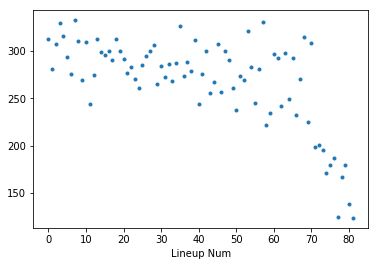

In [502]:
plotLineupActualFP(created)

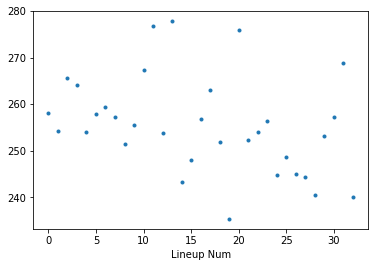

In [503]:
plotLineupProjectedFP(actual, "FantasyFuelPPGProj")

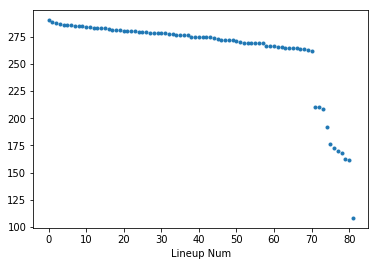

In [504]:
plotLineupProjectedFP(created, 'Avg Proj')

In [526]:
def dropLowScoringPlayers(file):
    file = file.reset_index().drop(['Lineup Num', 'Unnamed: 1' ], axis=1)
    file.drop_duplicates(subset ="Player Name", keep = 'first', inplace = True) 
    drop_level = file['Actual FP'].mean() - file['Actual FP'].std()
    return file[file.apply(lambda  x: x['Actual FP'] > drop_level, axis=1)]

def dropLowSelectedPlayers(file):
    file = file.reset_index().drop(['Lineup Num', 'Unnamed: 1' ], axis=1)
    file = addPlayerOccurences(file)
    file.drop_duplicates(subset ="Player Name", keep = 'first', inplace = True) 
    drop_level = file['Selected'].mean() - file['Selected'].std()
    return file[file.apply(lambda  x: x['Selected'] > 1, axis=1)]

def addPlayerOccurences(file):
    file['Selected'] = np.nan
    values = file['Player Name'].value_counts().keys().tolist()
    counts = file['Player Name'].value_counts().tolist()
    for i in range(len(values)):
        file.loc[file['Player Name'] == values[i],['Selected']] = counts[i]
    return file

act = set(dropLowScoringPlayers(actual)['Player Name'].value_counts().keys().tolist())

cre = set(dropLowSelectedPlayers(created)['Player Name'].value_counts().keys().tolist())


print(len(act.intersection(cre)))

34


In [527]:
len(act)

43

In [518]:
len(cre)

84

In [519]:
act.symmetric_difference(cre)

{'Aaron Gordon',
 'Anfernee Simons',
 'Brandon Ingram',
 'Bruno Fernando',
 'CJ McCollum',
 'Caleb Swanigan',
 'Caris LeVert',
 'Carmelo Anthony',
 'Damian Jones',
 'Damian Lillard',
 'Dario Saric',
 'Dillon Brooks',
 "E'Twaun Moore",
 'Edmond Sumner',
 'Elfrid Payton',
 'Evan Fournier',
 'Frank Ntilikina',
 'Gary Payton II',
 'Grant Williams',
 'Ian Mahinmi',
 'Isaac Bonga',
 'Isaiah Thomas',
 'Ja Morant',
 'JaMychal Green',
 'Jakarr Sampson',
 'Jarrett Allen',
 'Jaxson Hayes',
 'Jaylen Brown',
 'Jeff Teague',
 'Joe Harris',
 'John Collins',
 'Jonas Valanciunas',
 'Jrue Holiday',
 'Justin Holiday',
 'Kevin Huerter',
 'Kevin Knox II',
 'Khem Birch',
 'Lonzo Ball',
 'Marcus Morris Sr.',
 'Marcus Smart',
 'Marko Guduric',
 'Mitchell Robinson',
 'Nicolas Claxton',
 'Nikola Vucevic',
 'Patrick Patterson',
 'Ricky Rubio',
 'Rodions Kurucs',
 'Rodney McGruder',
 'Spencer Dinwiddie',
 'Taj Gibson',
 'Taurean Prince',
 'Terrence Ross',
 'Timothe Luwawu-Cabarrot',
 'Treveon Graham',
 'Trevor Ar

In [520]:
act.difference(cre)

{'Aaron Gordon',
 'CJ McCollum',
 'Damian Lillard',
 'Frank Ntilikina',
 'Justin Holiday',
 'Nicolas Claxton',
 'Patrick Patterson',
 'Taj Gibson',
 'Vince Carter'}

In [521]:
actual['Player Name'].value_counts()

Michael Carter-Williams    29
Trae Young                 29
Domantas Sabonis           29
De'Andre Hunter            25
Damian Lillard             24
JJ Redick                  18
Josh Hart                  14
Jeremy Lamb                14
Zion Williamson            13
Kelly Oubre Jr.             8
Bradley Beal                6
Mikal Bridges               5
Patrick Patterson           4
Deandre Ayton               4
Aaron Gordon                2
Jaren Jackson Jr.           2
Kyle Anderson               2
Jordan McRae                2
Vince Carter                2
Julius Randle               2
CJ McCollum                 2
Doug McDermott              2
Kemba Walker                2
Nicolas Claxton             1
Cam Reddish                 1
Devin Booker                1
Jerome Robinson             1
Taj Gibson                  1
Garrett Temple              1
Solomon Hill                1
De'Anthony Melton           1
Reggie Bullock              1
Grant Williams              1
Frank Ntil

In [522]:
created['Player Name'].value_counts()

Trae Young           52
Jaylen Brown         43
Joe Harris           40
Julius Randle        37
Deandre Ayton        32
Bobby Portis         32
Devin Booker         25
Spencer Dinwiddie    20
Domantas Sabonis     17
Bradley Beal         15
Brandon Clarke       15
Caris LeVert         14
Elfrid Payton        14
Dillon Brooks        12
Kelly Oubre Jr.      10
John Collins         10
Troy Brown Jr.        9
Kemba Walker          9
JJ Redick             9
Marcus Smart          8
Kevin Huerter         7
Mikal Bridges         7
Khem Birch            6
Reggie Bullock        6
Grant Williams        6
Ja Morant             6
Jordan McRae          5
Evan Fournier         5
Cam Reddish           5
Jaren Jackson Jr.     5
                     ..
Markelle Fultz        2
Vince Carter          1
CJ McCollum           1
Aaron Gordon          1
Javonte Green         1
Hassan Whiteside      1
Lou Williams          1
Patrick Patterson     1
Taj Gibson            1
Vincent Poirier       1
Jerome Robinson 

In [523]:
actual.loc[0]

,Player Name,injury_status,team,opp,spread,over_under,implied_team_score,L5_dvp_rank,L5_ppg_floor,L5_ppg_avg,...,Floor FP,Ceil FP,Actual Min,Actual FP,Actual Val,FantasyFuelPPGProj,FantasyFuelValueProj,DFN_PPGProj,DFN_MinProj,DFN_ValueProj
Unnamed: 1,,,,,,,,,,,,,,,,,,,,,
0,Trae Young,NaN,ATL,WAS,-1.0,241.5,121.3,24,37.5,57.3,...,39.3,65.9,39.0,77.5,8.2,57.0,6.00,58.4,36.0,6.1
1,Jordan McRae,NaN,WAS,ATL,1.0,241.5,120.3,27,5.8,17.7,...,11.4,37.7,17.8,28.8,6.3,21.8,4.73,24.9,23.5,5.4
2,Jeremy Lamb,NaN,IND,POR,3.0,220.0,108.5,20,4.3,20.7,...,17.5,35.5,33.5,38.5,8.8,25.0,5.68,23.8,27.0,5.4
3,De'Andre Hunter,NaN,ATL,WAS,-1.0,241.5,121.3,12,15.5,23.1,...,11.8,31.2,27.6,34.3,8.2,22.5,5.36,21.5,30.5,5.1
4,Michael Carter-Williams,NaN,ORL,LAC,3.5,219.0,107.8,5,3.5,13.9,...,8.4,23.2,22.7,36.3,10.7,17.5,5.15,18.2,19.0,5.4
5,Josh Hart,NaN,NO,BOS,1.0,231.5,115.3,7,20.3,27.9,...,17.1,33.7,28.5,26.5,6.8,19.5,5.00,20.2,26.0,5.2
6,Domantas Sabonis,NaN,IND,POR,3.0,220.0,108.5,6,19.8,38.4,...,35.0,52.5,41.0,66.0,7.6,46.0,5.29,46.1,34.5,5.3
7,Damian Lillard,NaN,POR,IND,-3.0,220.0,111.5,16,45.5,62.2,...,36.7,61.5,38.5,84.0,8.1,48.8,4.69,48.8,36.5,4.7
